In [89]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# My model

In [91]:
class MyMultiVarLinReg :
    
    def __init__(self, J_history =[]):
        self.w : np.ndarray
        self.b : np.ndarray
        self.J_history = J_history 

        
    def predict(self, x, w, b): 
        """
        single predict using linear regression
        
        Args:
          x (ndarray): Shape (n,) example with multiple features
          w (ndarray): Shape (n,) model parameters    
          b (scalar):  model parameter     
          
        Returns:
          p (scalar):  prediction
        """

        # Using Vectorization :
        p = np.dot(x, w) + b                  
        return p



    def compute_cost(self, X, y, w, b): 
        """
        compute cost
        Args:
          X (ndarray (m,n)): Data, m examples with n features
          y (ndarray (m,)) : target values
          w (ndarray (n,)) : model parameters  
          b (scalar)       : model parameter
          
        Returns:
          cost (scalar): cost
        """

        m = X.shape[0]
        y_pred = self.predict(X, w, b)
        cost = np.sum(((y_pred  - y )**2)/(m*2))
        return cost



    def compute_gradient(self, X, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          X (ndarray (m,n)): Data, m examples with n features
          y (ndarray (m,)) : target values
          w (ndarray (n,)) : model parameters  
          b (scalar)       : model parameter
          
        Returns:
          dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
          dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
        """
        m, n = X.shape           #(number of examples, number of features)

        # Calculate errors for all examples at once
        errors = (np.dot(X, w) + b) - y   

        # Calculate gradients for weights
        dj_dw = np.dot(errors, X) / m   

        # Calculate gradient for bias
        dj_db = np.sum(errors) / m                              
  
        return dj_db, dj_dw                           
            


    def gradient_descent(self, X, y, w_in, b_in, alpha, num_iters): 
        """
        Performs batch gradient descent to learn w and b. Updates w and b by taking 
        num_iters gradient steps with learning rate alpha
        
        Args:
          X (ndarray (m,n))   : Data, m examples with n features
          y (ndarray (m,))    : target values
          w_in (ndarray (n,)) : initial model parameters  
          b_in (scalar)       : initial model parameter
          cost_function       : function to compute cost
          gradient_function   : function to compute the gradient
          alpha (float)       : Learning rate
          num_iters (int)     : number of iterations to run gradient descent
          
        Returns:
          w (ndarray (n,)) : Updated values of parameters 
          b (scalar)       : Updated value of parameter 
          """
        
        # An array to store cost J and w's at each iteration primarily for graphing later
        J_history = []
        w = copy.deepcopy(w_in)  #avoid modifying global w within function
        b = b_in
        
        for i in range(num_iters):

            # Calculate the gradient and update the parameters
            dj_db,dj_dw = self.compute_gradient(X, y, w, b)   ##None

            # Update Parameters using w, b, alpha and gradient
            w = w - alpha * dj_dw               ##None
            b = b - alpha * dj_db               ##None
          
            # Save cost J at each iteration
            if i<100000:      # prevent resource exhaustion 
                J_history.append( self.compute_cost(X, y, w, b))

            # Print cost every at intervals 10 times or as many iterations if < 10
            if i% math.ceil(num_iters / 10) == 0:
                print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
            
        return w, b, J_history #return final w,b and J history for graphing
    



    def fit(self,X, y, alpha, num_iters):
        
        self.w = np.ones((X.shape[1]))*0.5
        self.b = 0
        self.w, self.b, self.J_history = self.gradient_descent(X, y, self.w, self.b, alpha, num_iters)
        

    def prediction(self, X):
        return self.predict(X, self.w, self.b)

# sgdr

Load the data set

In [92]:
data = np.loadtxt("houses_data.txt", delimiter=',')
X_train = data[:,:2]
y_train = data[:,2]

Scale/normalize the training data

In [93]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2406.    4.]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357]


Create and fit the regression model

In [94]:
my_model = MyMultiVarLinReg()
my_model.fit(X_norm, y_train, alpha = 5.0e-3, num_iters = 1000)

Iteration    0: Cost     1.21   
Iteration  100: Cost     0.46   
Iteration  200: Cost     0.21   
Iteration  300: Cost     0.12   
Iteration  400: Cost     0.09   
Iteration  500: Cost     0.08   
Iteration  600: Cost     0.08   
Iteration  700: Cost     0.08   
Iteration  800: Cost     0.08   
Iteration  900: Cost     0.08   


In [95]:
my_model.prediction(X_norm[:10])

array([1.02989335, 1.28255613, 1.72894994, 1.58798347, 1.73656975,
       1.25975759, 0.97401475, 1.65846671, 1.1441296 , 2.58802253])

In [96]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 19, number of weight updates: 1901.0


View parameters     
Note, the parameters are associated with the normalized input data. The fit parameters are very close to those found in the previous lab with this data.

In [97]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [0.24970299 0.05475056], b:[1.35127951]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


In [99]:
my_model.b

1.370817523361212

Make predictions
Predict the targets of the training data. Use both the predict routine and compute using  𝑤
  and  𝑏
 .

In [8]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[1.01141861 1.26972262 1.70021685 1.5642713 ]
Target values 
[1. 1. 2. 2.]


IndexError: index 2 is out of bounds for axis 1 with size 2

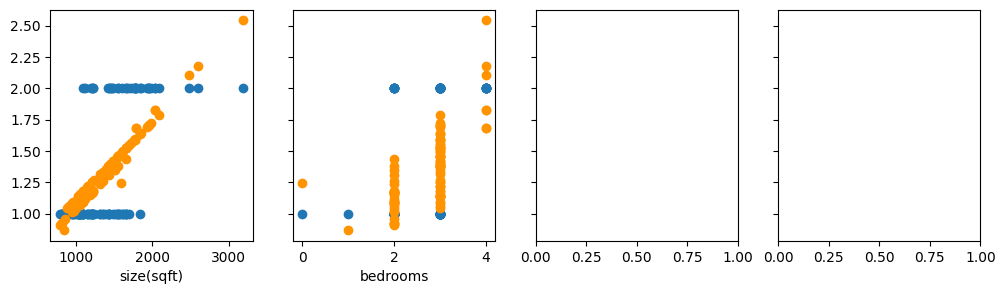

In [12]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(['size(sqft)','bedrooms','floors','age'][i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()